# 応用演習2<画像生成>



---



　この演習では、訓練済みの画像生成AIを用いた画像生成を行います。
画像生成AIは、ランダムなノイズを与えるだけで、高いクオリティの画像を出力することができます。


---


> 今回使用するモデルは、Generative Adversarial Nets (GANs)と呼ばれるモデルです。


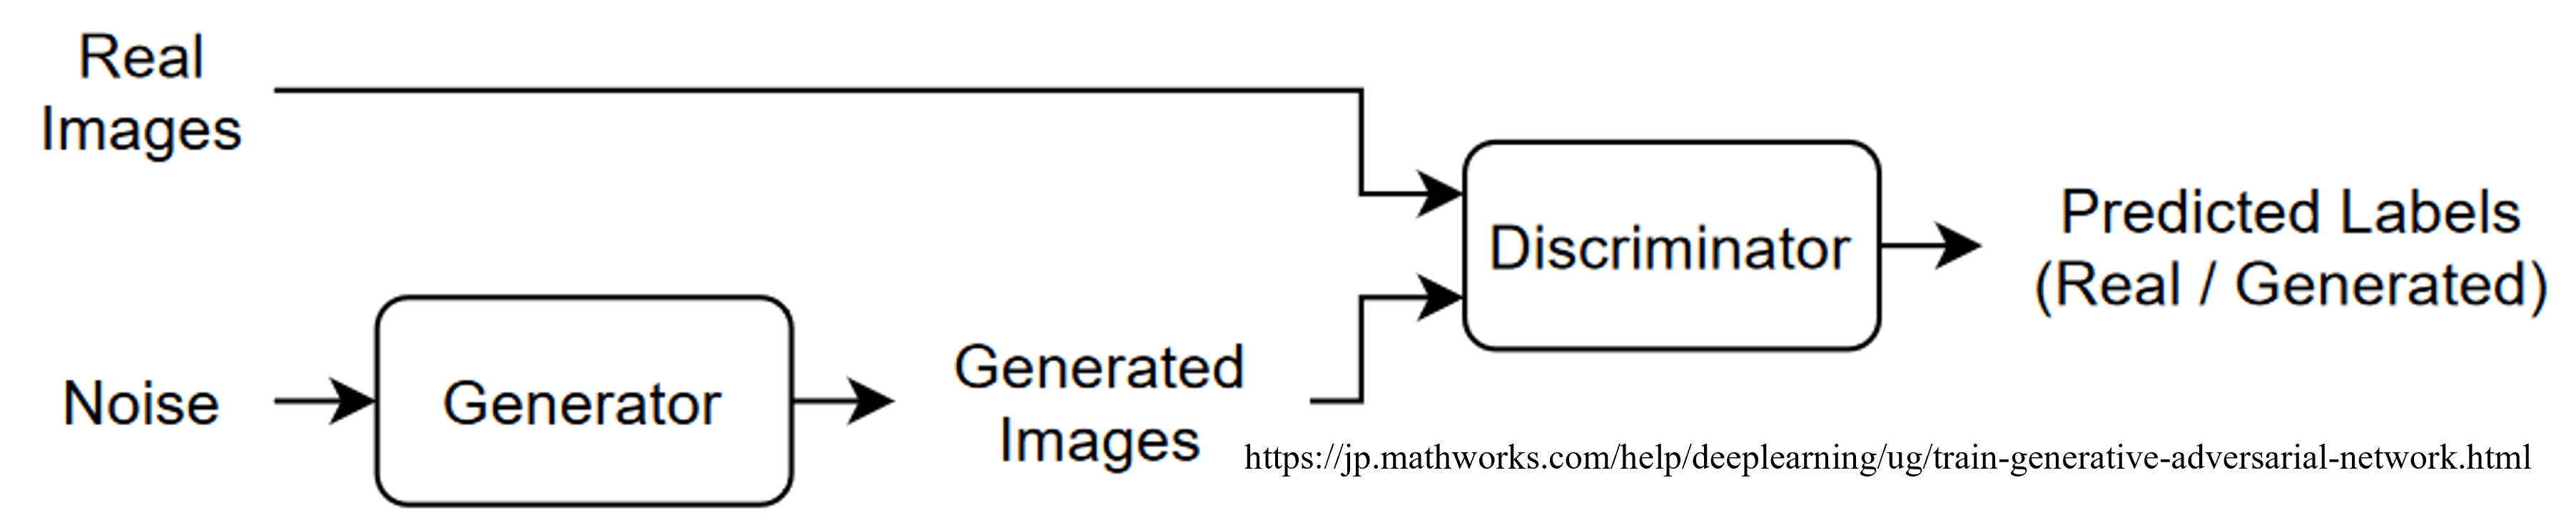

> 簡単に説明すると、GANsは２つの異なるネットワークであるDiscriminator (識別器) とGenerator (生成器) で構成されます。識別器は、1. 本物画像 と 2. 生成器によって作られた画像 の２つを見分ける訓練を行いますが、逆に、生成器は、識別器を騙すような画像の生成を目指します。












> 初めに、訓練されたGANsの生成器をダウンロードします。今回は用いるのは、"CelebaA"と呼ばれる海外の有名人の顔を集めたデータセットで訓練されたモデルです。
サイズ512x512の画像を生成します。



In [ ]:
import torch

#GPUが使用可能な場合にTrue
use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/zipball/hub" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /root/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth
100%|██████████| 264M/264M [00:02<00:00, 98.6MB/s]


Average network found !




> 次に、生成器に入力するノイズを生成します。Pytorchのtorch.normal()を使うと正規分布から抽出された乱数を返します。torch.normal()は以下の引数を必要とします。

> torch.normal(mean, std, size, *, out=None)

> つまり、次のコードは、mean(平均)=0, std(分散)=1の標準正規分布からノイズを生成することを表します。size=(1,512)は、1次元目の(1)が画像枚数、2次元目の(512)がノイズベクトルの大きさです。










In [ ]:
noise = torch.normal(0,1,size=(1,512))


> "ノイズ"とは何でしょうか。画像として表示できたらイメージがつかみやすいと思います。

> 面倒ですが画像を表示するコードを書きます。何回か使用するので関数として定義します。(今は動作の詳細は重要ではありませんが、愚直に画像に変換しているだけなので時間があったら追ってみてください。)





In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def pltImage(x):
  x_np = x.cpu().numpy()
  num_batch = x_np.shape[0]
  for i in range(num_batch):
    if i == 0:
        x_grid = x_np[0]
    else:
        x_grid = np.concatenate((x_grid,x_np[i]),2)
  x_grid = x_grid.transpose(1,2,0)
  x_grid = (x_grid+1)/2
  plt.imshow(x_grid)



> それでは、ノイズを画像として表示してます。ノイズを3チャネルのサイズ32x32の画像として生成します。



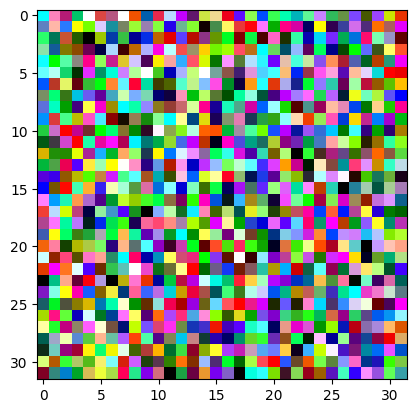

In [ ]:
noise_img = torch.normal(0,1,size=(1,3,32,32))
pltImage(noise_img)



>





> 前置きが長くなりましたが、ついにGANsの実装です。先ほどの何でもないノイズから画像が生成されます。



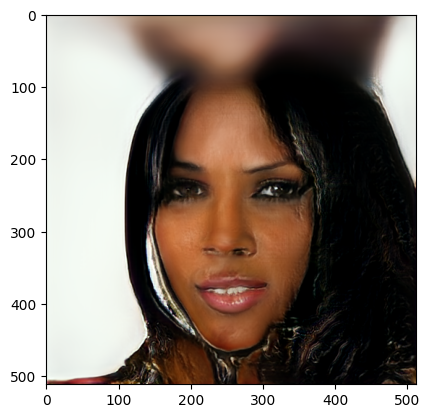

In [ ]:
generated_images = model.test(noise)
pltImage(generated_images)



> 少し違和感がありますが、人の顔が生成されました。生成モデルの良いところは、視覚的に楽しいことです ^o^


---




> 練習として次のことを確認しましょう。




1.   GANsの生成画像はノイズによって変化します。torch.normal()を変更して生成する画像枚数を5枚にして比べてみましょう。
2.   GANsの良いところは生成速度の速さです。GoogleColabのGPUを使うとさらに速くなることを体感しましょう。
3.  入力するノイズを一様分布から抽出したものに変更して生成しましょう。




---



